# 📊 Data Preprocessing for IoT Time Series Forecasting
In this notebook, we will:
- Load the **ETTh1** IoT sensor dataset
- Perform basic **exploration** and **visualization**
- Handle **missing values**
- Apply **normalization**
- Detect simple **anomalies** using statistical methods

In [4]:
# 📥 Step 1: Load dataset from GitHub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from io import StringIO

url = 'https://raw.githubusercontent.com/zhouhaoyi/ETDataset/main/ETT-small/ETTh1.csv'
response = requests.get(url, verify=False)  # Disable SSL verification
csv_data = StringIO(response.text)
df = pd.read_csv(csv_data, parse_dates=['date'])
df.set_index('date', inplace=True)
df.head()

/Users/beratburakkaya/Desktop/iot_timeseries_machine_learning/.venv/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
date,,,,,,,
2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


Shape: (17420, 7)
               HUFL          HULL          MUFL          MULL          LUFL  \
count  17420.000000  17420.000000  17420.000000  17420.000000  17420.000000   
mean       7.375141      2.242242      4.300239      0.881568      3.066062   
std        7.067744      2.042342      6.826978      1.809293      1.164506   
min      -22.705999     -4.756000    -25.087999     -5.934000     -1.188000   
25%        5.827000      0.737000      3.296000     -0.284000      2.315000   
50%        8.774000      2.210000      5.970000      0.959000      2.833000   
75%       11.788000      3.684000      8.635000      2.203000      3.625000   
max       23.643999     10.114000     17.341000      7.747000      8.498000   

               LULL            OT  
count  17420.000000  17420.000000  
mean       0.856932     13.324672  
std        0.599552      8.566946  
min       -1.371000     -4.080000  
25%        0.670000      6.964000  
50%        0.975000     11.396000  
75%        1.21800

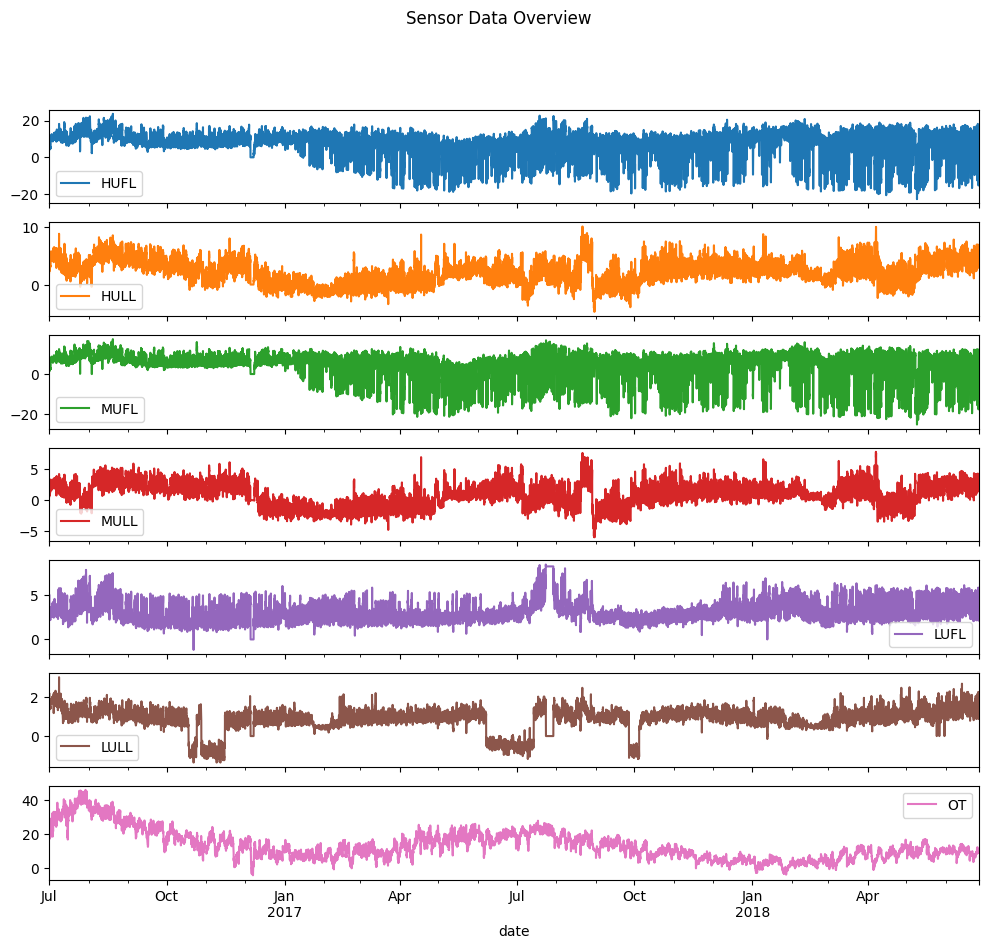

In [5]:
# 📈 Step 2: Explore the dataset
print(f"Shape: {df.shape}")
print(df.describe())
df.plot(subplots=True, figsize=(12, 10), title='Sensor Data Overview');

In [6]:
# 🧼 Step 3: Handle missing values (Linear Interpolation)
missing_before = df.isna().sum()
df.interpolate(method='linear', inplace=True)
missing_after = df.isna().sum()
missing_before, missing_after

(HUFL    0
 HULL    0
 MUFL    0
 MULL    0
 LUFL    0
 LULL    0
 OT      0
 dtype: int64,
 HUFL    0
 HULL    0
 MUFL    0
 MULL    0
 LUFL    0
 LULL    0
 OT      0
 dtype: int64)

In [7]:
# 🔃 Step 4: Normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, index=df.index, columns=df.columns)
scaled_df.head()

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
date,,,,,,,
2016-07-01 00:00:00,0.615599,0.454943,0.628980,0.467510,0.556576,0.613765,0.691018
2016-07-01 01:00:00,0.612708,0.459449,0.626458,0.464878,0.550279,0.620783,0.636233
2016-07-01 02:00:00,0.601143,0.436920,0.621438,0.459689,0.512595,0.586144,0.636233
2016-07-01 03:00:00,0.599698,0.450437,0.621438,0.462320,0.515693,0.599955,0.581468
2016-07-01 04:00:00,0.605480,0.450437,0.626458,0.467510,0.521990,0.599955,0.519656


Total anomalies detected: 1466


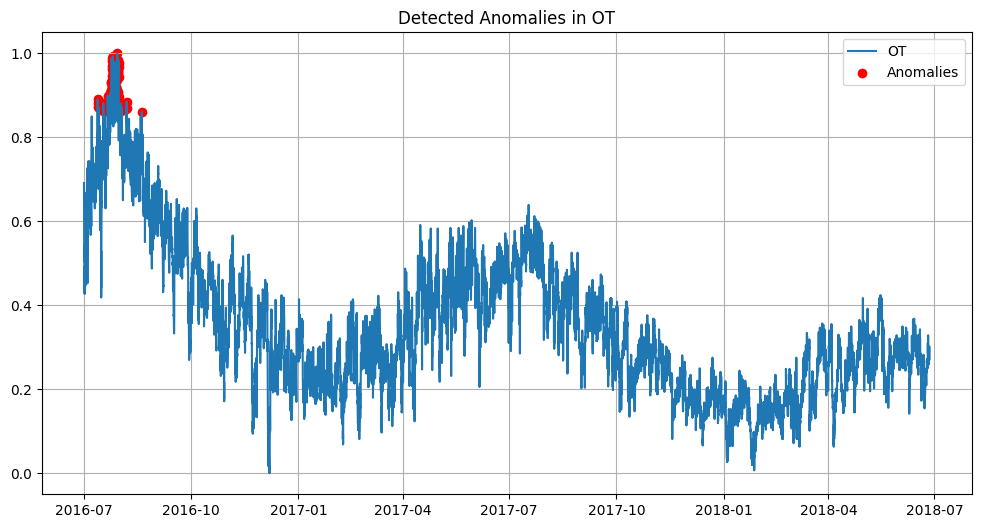

In [8]:
# 🚨 Step 5: Simple Anomaly Detection using Z-score
from scipy.stats import zscore

z_scores = np.abs(zscore(scaled_df))
anomalies = (z_scores > 3)
print(f"Total anomalies detected: {anomalies.sum().sum()}")
anomaly_map = anomalies.astype(int)
plt.figure(figsize=(12, 6))
plt.plot(scaled_df['OT'], label='OT')
ot_index = scaled_df.columns.get_loc('OT')  # Get the column index for 'OT'
plt.scatter(scaled_df.index[anomalies[:, ot_index]], scaled_df['OT'][anomalies[:, ot_index]], 
            color='red', label='Anomalies')
plt.legend()
plt.title('Detected Anomalies in OT')
plt.grid(True)
plt.show()

In [ ]:
# 💾 Save cleaned and normalized data for modeling
scaled_df.to_csv('../data/processed/etth1_processed.csv')
print("✅ Data saved to data/processed/etth1_processed.csv")

In [9]:
# Display the head of the raw data
print("Raw Data (Head):")
print(df.head())

# Display the head of the processed data
print("\nProcessed Data (Head):")
print(scaled_df.head())

# Highlight the changes
print("\nChanges:")
print("1. The raw data has been normalized to a range of [0, 1] using MinMaxScaler.")
print("2. The processed data no longer contains missing values (handled via interpolation).")

Raw Data (Head):
                      HUFL   HULL   MUFL   MULL   LUFL   LULL         OT
date                                                                    
2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001
2016-07-01 02:00:00  5.157  1.741  1.279  0.355  3.777  1.218  27.787001
2016-07-01 03:00:00  5.090  1.942  1.279  0.391  3.807  1.279  25.044001
2016-07-01 04:00:00  5.358  1.942  1.492  0.462  3.868  1.279  21.948000

Processed Data (Head):
                         HUFL      HULL      MUFL      MULL      LUFL  \
date                                                                    
2016-07-01 00:00:00  0.615599  0.454943  0.628980  0.467510  0.556576   
2016-07-01 01:00:00  0.612708  0.459449  0.626458  0.464878  0.550279   
2016-07-01 02:00:00  0.601143  0.436920  0.621438  0.459689  0.512595   
2016-07-01 03:00:00  0.599698  0.450437  0.621438  0.462320  0.515693   
2016-07-01